In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_params import * 
from scipy.spatial.distance import cdist
import math
from copy import deepcopy
from numpy.linalg import norm
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython import display

In [2]:
def Generate_charges(n_charges, radius):
    r = radius * np.sqrt(np.random.rand(n_charges))
    theta = np.random.rand(n_charges) * 2 * np.pi
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.array([[a, b] for a,b in zip(x,y)])

def Calculate_Etot(positions, n_charges, radius):
    dist = cdist(positions,positions,'euclidean')
    #print(1/dist[dist>0])
    #print(np.sum(1/dist[dist>0]))
    return 1/2*np.sum(1/dist[dist>0])/(n_charges*radius)

def Calculate_step(positions, i_particle, step_constant):
    #dist = cdist(positions,positions,'euclidean')
    #dist = dist[:,i_particle]
    #Etot = np.sum(1/dist[dist>0])
    
    x = pos[:,0]
    x_dist =  x - x.reshape(-1, 1)
    x_step = np.sum(x_dist[:,i_particle])
    y = pos[:,1]
    y_dist = y - y.reshape(-1, 1)
    y_step = np.sum(y_dist[:,i_particle])
    dist = cdist(positions,positions,'euclidean')
    dist = dist[:,i_particle]
    norm = (1/np.sum(dist[dist>0]))
    #force = step_constant * Etot**3 * np.array([x_step,y_step])
    #print(force)
    #print(Etot*math.sqrt(x_step**2+y_step**2))
    
    force = step_constant*(np.array([x_step, y_step])/(math.sqrt(x_step**2+y_step**2))**3)
    #force = step_constant * norm**3 * np.array([x_step,y_step])
    #check = norm*np.array([x_step,y_step])
    #check = (np.array([x_step, y_step])/(math.sqrt(x_step**2+y_step**2)))
    #print(math.sqrt(check[0]**2+check[1]**2))
    #print(force)
    return force

def Inside_circle(point, r_max):
    r = math.sqrt(point[0]**2+point[1]**2)
    #print(point,r)
    #print(r<=r_max)
    return r<=r_max

def Cooling_schedule(T_init, n_steps, constant):
    T = np.zeros(n_steps)
    for i in range(n_steps):
        T[i] = T_init*pow(constant,i)
    return T

In [3]:
n_charges = 3
step_constant = 0.5
radius = 1
pos_init = Generate_charges(n_charges, radius)
T_initial = 200
n_steps = 1000
Temp = Cooling_schedule(T_initial, n_steps, 0.99)
ims = []
constant = np.array([0.05, 0.001])

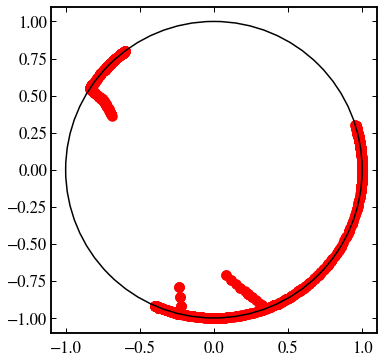

In [4]:
T = T_initial
pos = deepcopy(pos_init)
ims = []
j = 0
fig = plt.figure()
circle1 = plt.Circle((0,0),radius, fill=False)
plt.gca().add_patch(circle1)
plt.axis('square')
test = np.zeros(n_steps)
#plt.scatter(pos[:,0], pos[:,1])
for i in range(n_steps):
    T = Temp[i]
    E_tot = Calculate_Etot(pos, radius, n_charges)
    i_particle = np.random.randint(n_charges)
    #step_constant = constant[j]*E_tot**2
    step_constant = 0.1
    step = Calculate_step(pos, i_particle, step_constant)
    pos_new = deepcopy(pos)
    pos_new[i_particle, :]+=step
    if not Inside_circle(pos_new[i_particle, :],radius):
        dist_to_circle = radius-math.sqrt(pos[i_particle, :][0]**2+pos[i_particle, :][1]**2)
        step_size = math.sqrt(step[0]**2+step[1]**2)
        step_angle = np.arctan2(step[1], step[0])
        point_angle = np.arctan2(pos[i_particle, :][1], pos[i_particle, :][0])
        angle_dif = step_angle-point_angle
        arc_length = step_size-dist_to_circle
        arc_angle = math.copysign(arc_length / radius,angle_dif)
        pos_new[i_particle, 0] = math.cos(point_angle+arc_angle)*radius
        pos_new[i_particle, 1] = math.sin(point_angle+arc_angle)*radius
    E_new = Calculate_Etot(pos_new, radius, n_charges)
    delta_E = E_new - E_tot
    u = np.random.rand()
    alpha = min(math.exp(-delta_E/T), 1)
    #test[i] = math.exp(-delta_E/T)
    test[i] = delta_E
    if (u <= alpha):
        pos = pos_new
    #step_constant=step_constant*0.99
    #plt.scatter(pos[:,0], pos[:,1])
    
    im = plt.scatter(pos[:,0], pos[:,1], c='r')
    ims.append([im])
    
#ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

#writer = PillowWriter(fps=60)
#ani.save("demo2.gif", writer=writer)

In [5]:
#fig = plt.figure()

#plt.show()
ani = animation.ArtistAnimation(fig, ims, interval = 60, blit=True)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 
#writer = PillowWriter(fps=n_steps)
#ani.save("demo2.gif", writer=writer)

[1.15572963 1.15508367 1.15327139]


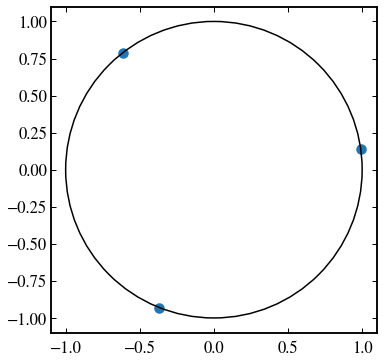

In [6]:
plt.scatter(pos[:,0], pos[:,1])
circle1 = plt.Circle((0,0),radius, fill=False)
plt.gca().add_patch(circle1)
plt.axis('square')
dist = cdist(pos,pos,'euclidean')
print(1/n_charges*np.sum(dist, axis=0))

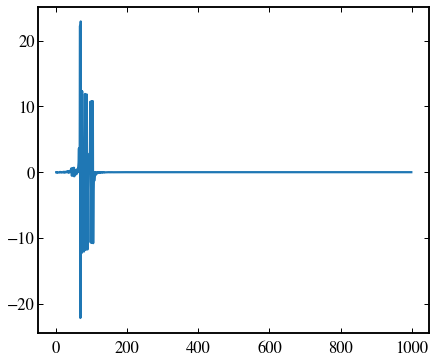

In [7]:
plt.plot(test)